<a href="https://colab.research.google.com/github/John-p-v1999/m-fold-and-LOOCV/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we will divide the dataset into 8 equal parts
we will do 2 fold validation on this and also leaveone out cross validation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
train_dir=os.path.join('/content/gdrive/My Drive/Dataset/data/train/')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(50,50),
                                                  batch_size=79,
                                                  class_mode='categorical')

Found 79 images belonging to 8 classes.


In [ ]:
x,y = train_generator.next()

we will be breaking them into 8 batches

In [ ]:
temp_x = []
temp_y = []
x_train = []
y_train = []
for i,ele in enumerate(x):
  if (i+1)%8 == 0:
    temp_x.append(ele)
    temp_y.append(y[i])
    x_train.append(temp_x)
    y_train.append(temp_y)
    temp_x = []
    temp_y = []
  else:
    temp_x.append(ele)
    temp_y.append(y[i])



In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape

(9, 8, 50, 50, 3)

**LEAVE ONE OUT CROSS VALIDATION**

WE JUST TAKE ONE OF THE BATCH AS TEST DATA AND THE REST ARE TRAINING DATA

In [ ]:
xval = x_train[3]  # randomly selecting the fourth batch
yval = y_train[3]
xtr = []
ytr = []
for i,ele in enumerate(x_train):
  if i == 3:
    continue
  else:
    for h,j in enumerate(ele):
      xtr.append(j)
      ytr.append(y_train[i][h])
    

In [ ]:
xtrn = np.array(xtr)
ytr = np.array(ytr)
xvali = np.array(xval)
yval = np.array(yval)

In [ ]:
xtr = xtrn.reshape(xtrn.shape[0],7500)
xval = xvali.reshape(xvali.shape[0],7500)

In [ ]:
xtr.shape

(64, 7500)

In [ ]:

height=50 #231
width=50 #195
channel=3

In [ ]:
import numpy as np
mean_face=np.zeros((1,height*width*channel))
for ele in xtr:
  mean_face=np.add(mean_face,ele)
mean_face=np.divide(mean_face,xtr.shape[0])

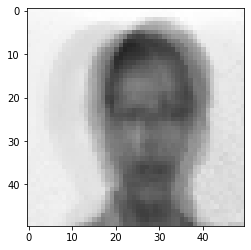

In [ ]:
plt.imshow(mean_face.reshape(height,width,channel))

In [ ]:
normalised_img=np.ndarray(shape=xtr.shape)
for i,ele in enumerate(xtr):
  normalised_img[i]=np.subtract(ele,mean_face)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


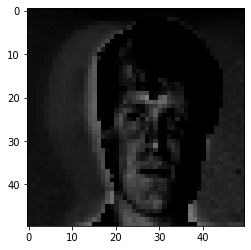

In [ ]:
plt.imshow(normalised_img[1].reshape(height,width,channel))
plt.show()

In [ ]:
cov_matrix = np.cov(normalised_img)
cov_matrix=np.divide(cov_matrix,64.0)
print(cov_matrix)

[[ 1.64075572e-03  4.19015835e-04  4.13644976e-04 ...  2.20015882e-04
  -2.25516639e-04  8.49635344e-05]
 [ 4.19015835e-04  5.48733415e-04  2.59611874e-04 ...  2.34771678e-04
  -1.23256908e-04  1.42862479e-04]
 [ 4.13644976e-04  2.59611874e-04  7.58917766e-04 ...  1.51769539e-04
  -3.44843502e-04  1.94818749e-04]
 ...
 [ 2.20015882e-04  2.34771678e-04  1.51769539e-04 ...  4.54335346e-04
  -1.71906681e-04  1.05750594e-04]
 [-2.25516639e-04 -1.23256908e-04 -3.44843502e-04 ... -1.71906681e-04
   6.60301105e-04 -1.30421635e-04]
 [ 8.49635344e-05  1.42862479e-04  1.94818749e-04 ...  1.05750594e-04
  -1.30421635e-04  5.48530510e-04]]


In [ ]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
reduced_data = np.array(eigvectors_sort).transpose()


proj_data = np.dot(normalised_img.transpose(),reduced_data)
proj_data = proj_data.transpose()

eigvalues_sort = np.array(eigvalues_sort)

In [ ]:
count_of_classes = {}
for i in range(0,8):
  count_of_classes[i]=0
  temp = 0
  for ele in ytr:
    if np.argmax(ele) == i:
      temp+=1
  count_of_classes[i] = temp
count_of_classes

{0: 8, 1: 10, 2: 7, 3: 8, 4: 9, 5: 7, 6: 7, 7: 8}

In [ ]:
mean_of_class = np.zeros((8,height*width*channel))
for i,ele in enumerate(ytr):
  mean_of_class[np.argmax(ele)]+=xtr[i]
for i,ele in enumerate(mean_of_class):
  mean_of_class[i]=np.divide(ele,count_of_classes[i])

In [ ]:
SB = np.zeros((1,1))
for i,ele in enumerate(mean_of_class):
  ele =ele.reshape(height*width*channel,1)
  sub = np.subtract(ele,mean_face.reshape(height*width*channel,1))
  sub = sub.dot(sub.T)
  sub = count_of_classes[i]*sub
  SB = SB+sub
SW = np.zeros((1,1))
for i,ele in enumerate(xtr):
  ele = ele.reshape(height*width*channel,1)
  sub = np.subtract(ele,mean_of_class[np.argmax(y[i])].reshape(height*width*channel,1))
  sub = sub.dot(sub.T)
  SW = SW +sub

In [ ]:
SB

array([[ 0.05070443,  0.05070443,  0.05070443, ..., -0.15072968,
        -0.15072968, -0.15072968],
       [ 0.05070443,  0.05070443,  0.05070443, ..., -0.15072968,
        -0.15072968, -0.15072968],
       [ 0.05070443,  0.05070443,  0.05070443, ..., -0.15072968,
        -0.15072968, -0.15072968],
       ...,
       [-0.15072968, -0.15072968, -0.15072968, ...,  2.2708    ,
         2.2708    ,  2.2708    ],
       [-0.15072968, -0.15072968, -0.15072968, ...,  2.2708    ,
         2.2708    ,  2.2708    ],
       [-0.15072968, -0.15072968, -0.15072968, ...,  2.2708    ,
         2.2708    ,  2.2708    ]])

In [ ]:
temp1 = np.dot(proj_data,SB)
temp1 = np.dot(temp1,proj_data.T)
temp2 = np.dot(proj_data,SW)
temp2 = np.dot(temp2,proj_data.T)
temp3 = np.divide(temp1,temp2)
eigenvaluesw, eigenvectorsw, = np.linalg.eig(temp3)
eigenvaluesb, eigenvectorsb, = np.linalg.eig(temp1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid ran

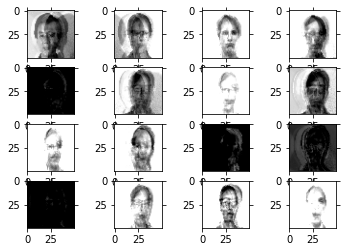

In [ ]:
final_eig_arrngd = np.zeros((64,64))
for i in range(64):
  highest = 0
  index =-1
  for j,ele in enumerate(eigenvaluesw):
    if highest<ele:
      highest = ele
      index = j
      eigenvaluesw[j] = float('-inf') 
  final_eig_arrngd[i] = eigenvectorsb[index]
fisher_face = final_eig_arrngd[:16]
fisher_face = np.dot(fisher_face,xtr)
for i in range(fisher_face.shape[0]):
    img = fisher_face[i].reshape(height,width,channel)
    plt.subplot(4,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or

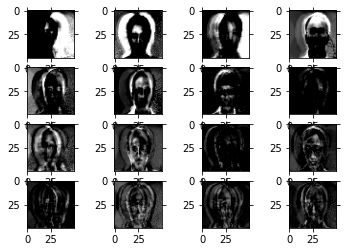

In [ ]:

reduced_data = np.array(eigvectors_sort[:16]).transpose()
proj_data_eigen = np.dot(xtr.transpose(),reduced_data)
proj_data_eigen = proj_data_eigen.transpose()
proj_data_eigen = proj_data_eigen.astype(float)
for i in range(proj_data_eigen.shape[0]):
    img = proj_data_eigen[i].reshape(height,width,channel)
    plt.subplot(4,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
import numpy as np
mean_face2=np.zeros((1,height*width*channel))
for ele in xval:
  mean_face=np.add(mean_face,ele)
mean_face=np.divide(mean_face,xval.shape[0])
normalised_img2=np.ndarray(shape=xval.shape)
for i,ele in enumerate(xval):
  normalised_img2[i]=np.subtract(ele,mean_face)

In [ ]:
dimension = [5,8,10,15,20]
acc_dimension_eigen = []
acc_dimension_eigen_var=[]
acc_dimension_fisher = []
acc_dimension_fisher_var = []
for i in dimension:
  fisher_face = final_eig_arrngd[:i]
  fisher_face = np.dot(fisher_face,normalised_img)  # fisher faces

  reduced_data = np.array(eigvectors_sort[:i]).transpose()
  proj_data_eigen = np.dot(xtr.transpose(),reduced_data)
  proj_data_eigen = proj_data_eigen.transpose()
  proj_data_eigen = proj_data_eigen.astype(float)   #eigen faces

  w_eigen = np.array([np.dot(proj_data_eigen,i) for i in normalised_img])
  w_fisher = np.array([np.dot(fisher_face,i) for i in normalised_img])
  
  acc_eigen = []
  acc_fisher = []
  
  
  w_eigen_test = np.array([np.dot(proj_data_eigen,i) for i in normalised_img2])
  w_fisher_test = np.array([np.dot(fisher_face,i) for i in normalised_img2])
    
  accuracy_eigen = 0
  accuracy_fisher = 0
  for u in range(w_eigen_test.shape[0]):
    w_unknown_eigen = w_eigen_test[u]
    w_unknown_fisher = w_fisher_test[u]
    diff_eigen  = w_eigen - w_unknown_eigen
    norms_eigen = np.linalg.norm(diff_eigen, axis=1)
    y_pred_eigen = np.argmin(norms_eigen)
    diff_fisher  = w_fisher - w_unknown_fisher
    norms_fisher = np.linalg.norm(diff_fisher, axis=1)
    y_pred_fisher = np.argmin(norms_fisher)
    if np.argmax(y[y_pred_eigen]) == np.argmax(yval[u]):
      accuracy_eigen+=1
    if np.argmax(y[y_pred_fisher]) == np.argmax(yval[u]):
      accuracy_fisher+=1
  accuracy_eigen = accuracy_eigen/w_eigen_test.shape[0]
  accuracy_fisher = accuracy_fisher/w_eigen_test.shape[0]
  acc_eigen.append(accuracy_eigen)
  acc_fisher.append(accuracy_fisher)
mean = np.mean(acc_eigen)
var = np.var(acc_eigen)
acc_dimension_eigen.append(mean)
acc_dimension_eigen_var.append(var)
mean = np.mean(acc_fisher)
var = np.var(acc_fisher)
acc_dimension_fisher.append(mean)
acc_dimension_fisher_var.append(var)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


[0.25]